# The vine copula (`Vinecop`) API

## Import the libraries

In [22]:
import pyvinecopulib as pv

import numpy as np

## A first vine copula

<pyvinecopulib.Vinecop> Vinecop model with 3 variables
tree edge conditioned variables conditioning variables var_types family rotation parameters  df   tau 
   1    1                  3, 1                             c, c    BB1       90 1.00, 2.00 2.0 -0.67 
   1    2                  2, 1                             c, c    BB1       90 1.00, 2.00 2.0 -0.67 
   2    1                  3, 2                      1      c, c    BB1       90 1.00, 2.00 2.0 -0.67 



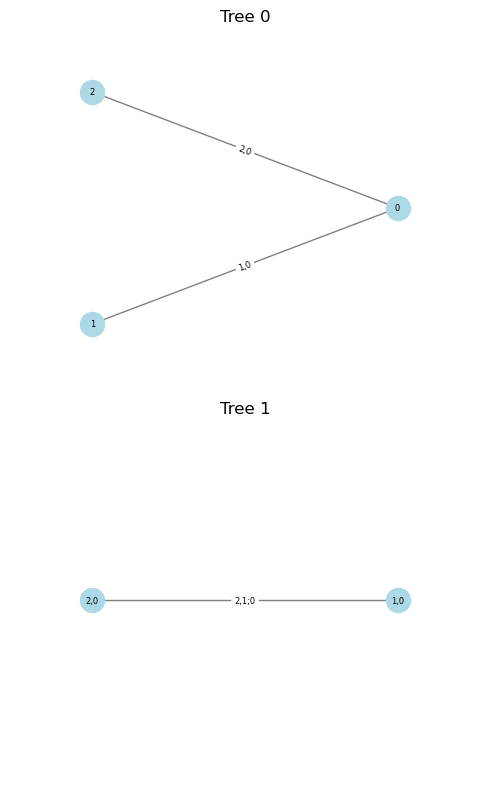

In [23]:
# Specify pair-copulas
bicop = pv.Bicop(pv.bb1, 90, parameters=np.array([[1.0], [2.0]]))
pcs = [[bicop, bicop], [bicop]]

# Specify R-vine matrix
mat = np.array([[1, 1, 1], [2, 2, 0], [3, 0, 0]])

# Set-up a vine copula
cop = pv.Vinecop.from_structure(matrix=mat, pair_copulas=pcs)
print(cop)
cop.plot()

## Showcase some methods

(<Figure size 840x840 with 9 Axes>,
 array([[<Axes: ylabel='var1'>, <Axes: >, <Axes: >],
        [<Axes: ylabel='var2 (z)'>, <Axes: >, <Axes: >],
        [<Axes: xlabel='var1 (z)', ylabel='var3 (z)'>,
         <Axes: xlabel='var2 (z)'>, <Axes: xlabel='var3'>]], dtype=object))

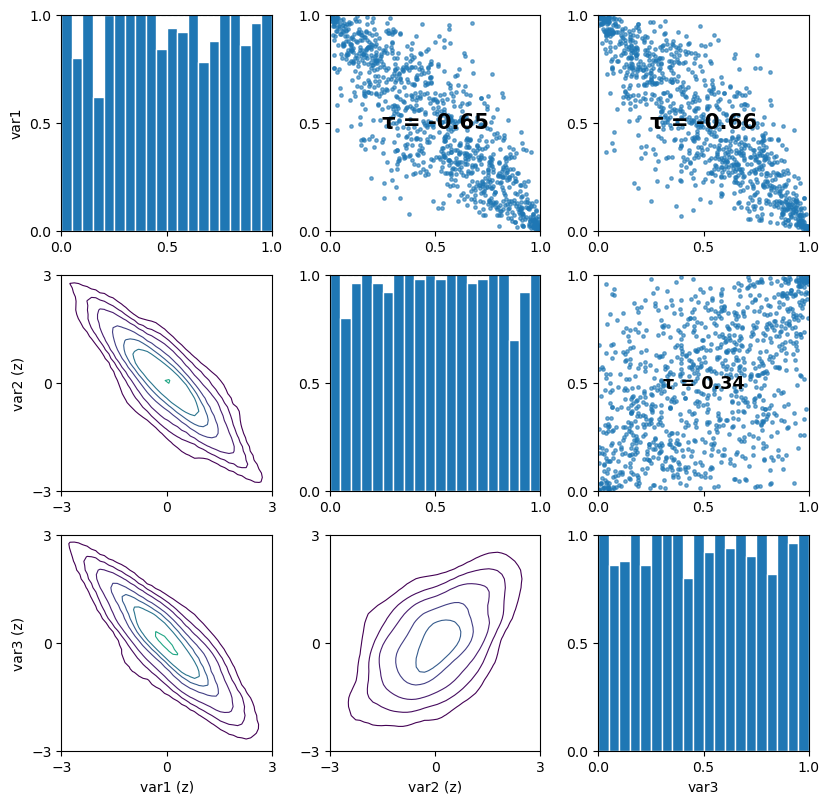

In [24]:
u = cop.simulate(n=1000, seeds=[1, 2, 3])
pv.pairs_copula_data(u)  # Visualize the simulated pair-copula data

In [25]:
# Evaluate various functions for the first 10 samples
u = u[:10, :]
fcts = [
  cop.pdf,
  cop.rosenblatt,
  cop.inverse_rosenblatt,
  cop.loglik,
  cop.aic,
  cop.bic,
]
[f(u) for f in fcts]

[array([  9.64091108,   0.87359882,  14.66737329,   4.67958213,
          7.73013565,   8.2626296 , 429.08734894,  10.27557579,
          9.6695691 ,  31.73104835]),
 array([[0.39834572, 0.58306208, 0.62781835],
        [0.1638618 , 0.12511687, 0.03259297],
        [0.14649436, 0.53506962, 0.19416263],
        [0.90118677, 0.97149881, 0.62800446],
        [0.61664802, 0.33426639, 0.30274465],
        [0.62193432, 0.49491002, 0.29487009],
        [0.98701895, 0.15973708, 0.40652872],
        [0.6902412 , 0.51336107, 0.37487839],
        [0.20454371, 0.13136605, 0.38700309],
        [0.13685699, 0.60725771, 0.47552933]]),
 array([[0.39834572, 0.633344  , 0.5478186 ],
        [0.1638618 , 0.83947886, 0.82385407],
        [0.14649436, 0.90468165, 0.77073467],
        [0.90118677, 0.14008307, 0.05778318],
        [0.61664802, 0.31041658, 0.45172058],
        [0.62193432, 0.33993435, 0.39711063],
        [0.98701895, 0.00167812, 0.17774749],
        [0.6902412 , 0.26458969, 0.35008842],
    

## Different ways to fit a copula (when the families and structure are known)...

In [26]:
u = cop.simulate(n=1000, seeds=[1, 2, 3])

# Define first an object to control the fits:
#    - pv.FitControlsVinecop objects store the controls
#    - here, we only restrict the parametric family
#    - see help(pv.FitControlsVinecop) for more details
controls = pv.FitControlsVinecop(family_set=[pv.bb1])
print(controls)

# Create a new object an select family and parameters by fitting to data
cop2 = pv.Vinecop.from_structure(matrix=mat, pair_copulas=pcs)
cop2.select(data=u, controls=controls)
print(cop2)

# Otherwise, create directly from data
cop2 = pv.Vinecop.from_data(data=u, matrix=mat, controls=controls)
print(cop2)

<pyvinecopulib.FitControlsVinecop>
Family set: BB1
Parametric method: mle
Nonparametric method: constant
Nonparametric multiplier: 1
Nonparametric grid size: 30
Weights: no
Selection criterion: bic
Preselect families: yes
mBIC prior probability: 0.9
Truncation level: none (default)
Tree criterion: tau
Threshold: 0
Select truncation level: no
Select threshold: no
Select families: yes
Show trace: no
Number of threads: 1
MST algorithm: mst_prim

<pyvinecopulib.Vinecop> Vinecop model with 3 variables
tree edge conditioned variables conditioning variables var_types family rotation parameters  df   tau 
   1    1                  3, 1                             c, c    BB1      270 0.36, 2.54 2.0 -0.67 
   1    2                  2, 1                             c, c    BB1       90 0.90, 2.00 2.0 -0.66 
   2    1                  3, 2                      1      c, c    BB1       90 1.03, 2.03 2.0 -0.68 

<pyvinecopulib.Vinecop> Vinecop model with 3 variables
tree edge conditioned variable

## When nothing is known, there are also two ways to fit a copula...

<pyvinecopulib.Vinecop> Vinecop model with 3 variables
tree edge conditioned variables conditioning variables var_types family rotation parameters  df   tau 
   1    1                  2, 1                             c, c    BB1       90 0.90, 2.00 2.0 -0.66 
   1    2                  1, 3                             c, c    BB1       90 0.36, 2.54 2.0 -0.67 
   2    1                  2, 3                      1      c, c    BB1      270 1.03, 2.03 2.0 -0.68 

<pyvinecopulib.Vinecop> Vinecop model with 3 variables
tree edge conditioned variables conditioning variables var_types family rotation parameters  df   tau 
   1    1                  2, 1                             c, c    BB1       90 0.90, 2.00 2.0 -0.66 
   1    2                  1, 3                             c, c    BB1       90 0.36, 2.54 2.0 -0.67 
   2    1                  2, 3                      1      c, c    BB1      270 1.03, 2.03 2.0 -0.68 



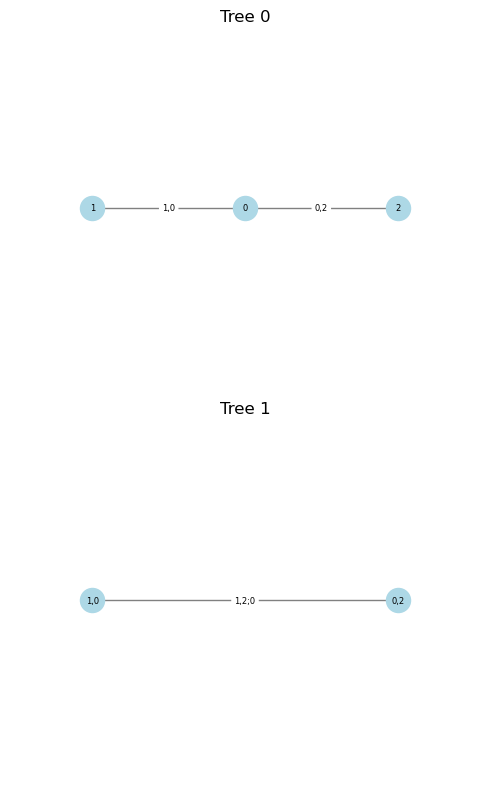

In [27]:
# Create a new object and select strucutre, family, and parameters
cop3 = pv.Vinecop(d=3)
cop3.select(data=u)
print(cop3)

# Otherwise, create directly from data
cop3 = pv.Vinecop.from_data(data=u)
print(cop3)
cop3.plot()

## C-vine structures

<pyvinecopulib.Vinecop> Vinecop model with 4 variables
tree edge conditioned variables conditioning variables var_types       family rotation parameters  df  tau 
   1    1                  4, 1                             c, c     Gaussian        0       0.50 1.0 0.33 
   1    2                  3, 1                             c, c      Clayton        0       3.00 1.0 0.60 
   1    3                  2, 1                             c, c      Student        0 0.40, 4.00 2.0 0.26 
   2    1                  4, 2                      1      c, c Independence                         0.00 
   2    2                  3, 2                      1      c, c     Gaussian        0       0.50 1.0 0.33 
   3    1                  4, 3                   2, 1      c, c     Gaussian        0       0.00 1.0 0.00 



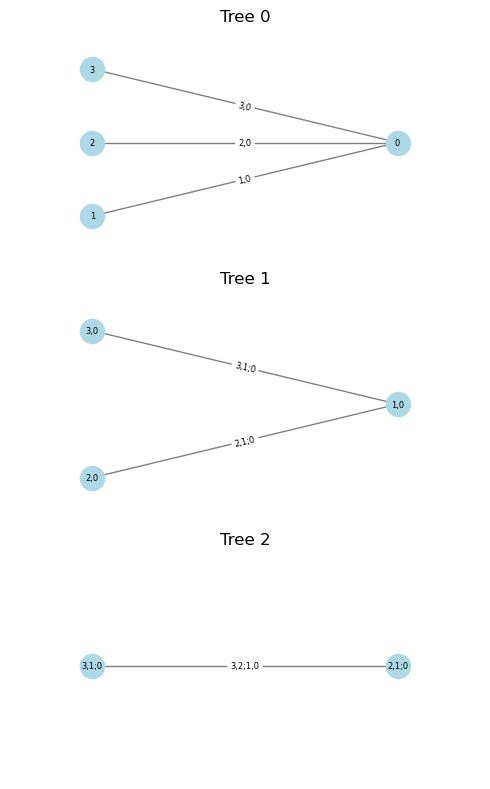

In [28]:
# create a C-vine structure with root node 1 in first tree, 2 in second, ...
cvine = pv.CVineStructure([4, 3, 2, 1])
# specify pair-copulas in every tree
tree1 = [
  pv.Bicop(pv.gaussian, 0, np.array([[0.5]])),
  pv.Bicop(pv.clayton, 0, np.array([[3.0]])),
  pv.Bicop(pv.student, 0, np.array([[0.4], [4]])),
]
tree2 = [
  pv.Bicop(pv.indep),
  pv.Bicop(pv.gaussian, 0, np.array([[0.5]])),
]
tree3 = [pv.Bicop(pv.gaussian)]

# instantiate C-vine copula model
cop = pv.Vinecop.from_structure(
  structure=cvine, pair_copulas=[tree1, tree2, tree3]
)
print(cop)
cop.plot()